In [24]:
import torch
import torch.nn
import torchvision
from torchvision import transforms
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler
from matplotlib import pyplot as plt
from torchvision.utils import make_grid
import pickle
import os
from matplotlib.lines import Line2D

In [25]:
# Define the used device
# Check whether cuda or cpu is used
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# If GPU is used, write cuda. Otherwise, CPU will be used for training
print(device) 

cpu


In [26]:
transform = transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
    torchvision.transforms.Grayscale()
])

# Training set
train_data = torchvision.datasets.CIFAR10("./data", train = True, download = True,
                                          transform = transform)
# Test set
test_data = torchvision.datasets.CIFAR10("./data", train = False,
                                         transform = transform)

Files already downloaded and verified


In [27]:
# Validation set that includes 10% of the training set
# So, firstly we should check the number of samples in the training set
train_length = len(train_data)

# Create a numpy array that stores the indices of train set from 0 to train_length
# In other words, [0, 50000)
train_indices = np.arange((train_length))

# Locate classes of each index so that they can be splitted equally
class_labels = np.array(train_data.targets)

# Take the 10% of the train set and store it as validation set length
validation_length = int(train_length*0.1)

# Number of samples per each class
class_sample_number = int(validation_length / len(train_data.classes))

# Create a list includes indices of each class
class_indices = [np.where(class_labels == i)[0] for i in range(len(train_data.classes))]

# Initialize the indices of the validation set
validation_indices = []

# Randomly chose indices per each class equally from the training set
for index in class_indices:
  validation_indices.extend(np.random.choice(index, class_sample_number, replace = False))

# Calculate the train indices after the validation split
train_indices = list(set(train_indices) - set(validation_indices))

# Create a train sampler by excluding indices that are separated for the validation set
train_sampler = SubsetRandomSampler(train_indices)

# Create a validation sampler by using the validation indices calculated
validation_sampler = SubsetRandomSampler(validation_indices) 

In [28]:
# Define dataloaders to that are sampled accordingly
batch_size = 50
train_generator = torch.utils.data.DataLoader(train_data, batch_size = batch_size, sampler = train_sampler)
test_generator = torch.utils.data.DataLoader(test_data, batch_size = batch_size)
validation_generator =  torch.utils.data.DataLoader(train_data, batch_size = batch_size, sampler = validation_sampler)

In [29]:
# Check whether the train, test and validation generators are created correctly
# In the beginning, the sizes of the datasets were as follows:
# Train Set: 50000
# Test Set : 10000
# Validation Set: 0

# After splitting 10% of the training set into validation set, these datasets are obtained:
# Train Set: 45000
# Test Set : 10000
# Validation Set: 5000

# According to the new values, the outputs of the DataLoaders should be as follows:
# train_generator: 45000 / 50 = 900
# test_generator : 10000 / 50 = 200
# validation_generator: 5000 / 50 = 100
# Where first operand is the number of images per each dataset, and the second operand is the batch size

# So, this assert tests whether the DataLoaders created correctly or not
assert( (len(train_generator) == 900) & (len(test_generator) == 200)  & (len(validation_generator) == 100) )

In [30]:
# Third Class: Convolutional Neural Network 3
class cnn_3_1(torch.nn.Module):
  def __init__(self):
    super(cnn_3_1, self).__init__()
    self.conv1 = torch.nn.Conv2d(1, 16, kernel_size = (3,3), stride = 1, padding = 0)
    self.relu1 = torch.nn.ReLU()
    self.conv2 = torch.nn.Conv2d(16, 8, kernel_size = (5,5), stride = 1, padding = 0)
    self.relu2 = torch.nn.ReLU()
    self.maxpool1 = torch.nn.MaxPool2d(kernel_size = (2,2), stride = 2, padding = 0)
    self.conv3 = torch.nn.Conv2d(8, 16, kernel_size = (7,7), stride = 1, padding = 0)
    self.maxpool2 = torch.nn.MaxPool2d(kernel_size = (2,2), stride = 2, padding = 0)
    self.fc  = torch.nn.Linear(16*3*3, 10, bias = False)
    
  def forward(self, x):
    x = self.conv1(x)
    x = self.relu1(x)
    x = self.conv2(x)
    x = self.relu2(x)
    x = self.maxpool1(x)
    x = self.conv3(x)
    x = self.maxpool2(x)
    x = x.view(-1, 16*3*3)
    
    x = self.fc(x)
    return x

In [31]:
# Third Class: Convolutional Neural Network 3
class cnn_3_01(torch.nn.Module):
  def __init__(self):
    super(cnn_3_01, self).__init__()
    self.conv1 = torch.nn.Conv2d(1, 16, kernel_size = (3,3), stride = 1, padding = 0)
    self.relu1 = torch.nn.ReLU()
    self.conv2 = torch.nn.Conv2d(16, 8, kernel_size = (5,5), stride = 1, padding = 0)
    self.relu2 = torch.nn.ReLU()
    self.maxpool1 = torch.nn.MaxPool2d(kernel_size = (2,2), stride = 2, padding = 0)
    self.conv3 = torch.nn.Conv2d(8, 16, kernel_size = (7,7), stride = 1, padding = 0)
    self.maxpool2 = torch.nn.MaxPool2d(kernel_size = (2,2), stride = 2, padding = 0)
    self.fc  = torch.nn.Linear(16*3*3, 10, bias = False)
    
  def forward(self, x):
    x = self.conv1(x)
    x = self.relu1(x)
    x = self.conv2(x)
    x = self.relu2(x)
    x = self.maxpool1(x)
    x = self.conv3(x)
    x = self.maxpool2(x)
    x = x.view(-1, 16*3*3)
    
    x = self.fc(x)
    return x

In [32]:
# Third Class: Convolutional Neural Network 3
class cnn_3_001(torch.nn.Module):
  def __init__(self):
    super(cnn_3_001, self).__init__()
    self.conv1 = torch.nn.Conv2d(1, 16, kernel_size = (3,3), stride = 1, padding = 0)
    self.relu1 = torch.nn.ReLU()
    self.conv2 = torch.nn.Conv2d(16, 8, kernel_size = (5,5), stride = 1, padding = 0)
    self.relu2 = torch.nn.ReLU()
    self.maxpool1 = torch.nn.MaxPool2d(kernel_size = (2,2), stride = 2, padding = 0)
    self.conv3 = torch.nn.Conv2d(8, 16, kernel_size = (7,7), stride = 1, padding = 0)
    self.maxpool2 = torch.nn.MaxPool2d(kernel_size = (2,2), stride = 2, padding = 0)
    self.fc  = torch.nn.Linear(16*3*3, 10, bias = False)
    
  def forward(self, x):
    x = self.conv1(x)
    x = self.relu1(x)
    x = self.conv2(x)
    x = self.relu2(x)
    x = self.maxpool1(x)
    x = self.conv3(x)
    x = self.maxpool2(x)
    x = x.view(-1, 16*3*3)
    
    x = self.fc(x)
    return x

In [ ]:
model = cnn_3_1()
model.to(device)

In [ ]:
model_01 = cnn_3_01()
model_01.to(device)

In [ ]:
model_001 = cnn_3_001()
model_001.to(device)

In [ ]:
# Traing the model
# Define the epoch number
epoch = 20

# Create train loss, validation and test accuracy lists
train_loss = []
validation_accuracy = []

# Calculate the total number of batches from division of train set and batch size 
batch_number = int(len(train_generator.dataset)/batch_size)

# Train and evaluate the model
# Create loss: use cross entropy loss
loss_func = torch.nn.CrossEntropyLoss()
# Create the SGD optimizer with default parameters
optimizer = torch.optim.SGD(model.parameters(), lr = 0.1, momentum = 0)
  
# For loop that iterates for each epoch
for cur_epoch in range(epoch):
  # Transfer the model to train mode
  model.train()
  for batch_idx, (x_train, y_train) in enumerate(train_generator):
    # Transfer the input and the output to the used device (cpu or cuda)
    x_train, y_train = x_train.to(device), y_train.to(device)

    # At every iteration reset the gradient to zero so that start from scratch
    optimizer.zero_grad()

    # Make prediction by using the model
    y_prediction = model(x_train)

    # Calculate the loss  
    loss = loss_func(y_prediction, y_train)

    # Backward pass and optimization step
    loss.backward()
    optimizer.step()
    
    if (batch_idx + 1) % 10 == 0:
      # Save training loss for every 10 steps
      train_loss.append(loss.item())

      # Save validation accuracy for every 10 steps
      for x_validation, y_validation in validation_generator:
        x_validation = x_validation.to(device)
        y_validation = y_validation.to(device)

        # Transfer the model to eval mode         
        model.eval()
        with torch.no_grad():

          # Calculate the validation accuracy
          # Initialize the correct and total predictions
          correct_validation = 0
          total_validation = 0

          output = model(x_validation)
          y_prediction = output.argmax(dim=1)

          for i in range(y_prediction.shape[0]):
            if y_validation[i] == y_prediction[i]:
              correct_validation += 1
            total_validation += 1

          # Append the validation accuracy result to the list
          validation_acc = 100 * correct_validation / total_validation
          validation_accuracy.append(validation_acc)

      print('Epoch [{}/{}], Step [{}/{}], Training Loss: {:.2f}%, Validation Acc: {:.2f}%'
                    .format(cur_epoch+1, epoch, batch_idx + 1, len(train_generator), loss.item(), validation_acc))

In [ ]:
# Traing the model
# Define the epoch number
epoch = 20

# Create train loss, validation and test accuracy lists
train_loss_01 = []
validation_accuracy_01 = []

# Calculate the total number of batches from division of train set and batch size 
batch_number = int(len(train_generator.dataset)/batch_size)

# Train and evaluate the model
# Create loss: use cross entropy loss
loss_func = torch.nn.CrossEntropyLoss()
# Create the SGD optimizer with default parameters
optimizer = torch.optim.SGD(model_01.parameters(), lr = 0.01, momentum = 0)
  
# For loop that iterates for each epoch
for cur_epoch in range(epoch):
  # Transfer the model to train mode
  model_01.train()
  for batch_idx, (x_train, y_train) in enumerate(train_generator):
    # Transfer the input and the output to the used device (cpu or cuda)
    x_train, y_train = x_train.to(device), y_train.to(device)

    # At every iteration reset the gradient to zero so that start from scratch
    optimizer.zero_grad()

    # Make prediction by using the model
    y_prediction = model_01(x_train)

    # Calculate the loss  
    loss = loss_func(y_prediction, y_train)

    # Backward pass and optimization step
    loss.backward()
    optimizer.step()
    
    if (batch_idx + 1) % 10 == 0:
      # Save training loss for every 10 steps
      train_loss_01.append(loss.item())

      # Save validation accuracy for every 10 steps
      for x_validation, y_validation in validation_generator:
        x_validation = x_validation.to(device)
        y_validation = y_validation.to(device)

        # Transfer the model to eval mode         
        model_01.eval()
        with torch.no_grad():

          # Calculate the validation accuracy
          # Initialize the correct and total predictions
          correct_validation = 0
          total_validation = 0

          output = model_01(x_validation)
          y_prediction = output.argmax(dim=1)

          for i in range(y_prediction.shape[0]):
            if y_validation[i] == y_prediction[i]:
              correct_validation += 1
            total_validation += 1

          # Append the validation accuracy result to the list
          validation_acc_01 = 100 * correct_validation / total_validation
          validation_accuracy_01.append(validation_acc_01)

      print('Epoch [{}/{}], Step [{}/{}], Training Loss: {:.2f}%, Validation Acc: {:.2f}%'
                    .format(cur_epoch+1, epoch, batch_idx + 1, len(train_generator), loss.item(), validation_acc_01))

In [ ]:
# Traing the model
# Define the epoch number
epoch = 20

# Create train loss, validation and test accuracy lists
train_loss_001 = []
validation_accuracy_001 = []

# Calculate the total number of batches from division of train set and batch size 
batch_number = int(len(train_generator.dataset)/batch_size)

# Train and evaluate the model
# Create loss: use cross entropy loss
loss_func = torch.nn.CrossEntropyLoss()
# Create the SGD optimizer with default parameters
optimizer = torch.optim.SGD(model_001.parameters(), lr = 0.001, momentum = 0)
  
# For loop that iterates for each epoch
for cur_epoch in range(epoch):
  # Transfer the model to train mode
  model_001.train()
  for batch_idx, (x_train, y_train) in enumerate(train_generator):
    # Transfer the input and the output to the used device (cpu or cuda)
    x_train, y_train = x_train.to(device), y_train.to(device)

    # At every iteration reset the gradient to zero so that start from scratch
    optimizer.zero_grad()

    # Make prediction by using the model
    y_prediction = model_001(x_train)

    # Calculate the loss  
    loss = loss_func(y_prediction, y_train)

    # Backward pass and optimization step
    loss.backward()
    optimizer.step()
    
    if (batch_idx + 1) % 10 == 0:
      # Save training loss for every 10 steps
      train_loss_001.append(loss.item())

      # Save validation accuracy for every 10 steps
      for x_validation, y_validation in validation_generator:
        x_validation = x_validation.to(device)
        y_validation = y_validation.to(device)

        # Transfer the model to eval mode         
        model_001.eval()
        with torch.no_grad():

          # Calculate the validation accuracy
          # Initialize the correct and total predictions
          correct_validation = 0
          total_validation = 0

          output = model_001(x_validation)
          y_prediction = output.argmax(dim=1)

          for i in range(y_prediction.shape[0]):
            if y_validation[i] == y_prediction[i]:
              correct_validation += 1
            total_validation += 1

          # Append the validation accuracy result to the list
          validation_acc_001 = 100 * correct_validation / total_validation
          validation_accuracy_001.append(validation_acc_001)

      print('Epoch [{}/{}], Step [{}/{}], Training Loss: {:.2f}%, Validation Acc: {:.2f}%'
                    .format(cur_epoch+1, epoch, batch_idx + 1, len(train_generator), loss.item(), validation_acc_001))

# To continue, add part5Plots function

In [43]:
train_result_dict = {
    'name': 'cnn_3',
    'loss_curve_1': train_loss,
    'loss_curve_01': train_loss_01,
    'loss_curve_001': train_loss_001,
    'val_acc_curve_1': validation_accuracy,
    'val_acc_curve_01': validation_accuracy_01,
    'val_acc_curve_001': validation_accuracy_001
}

# Save the dictionary object to a file
filename = 'part5_cnn_3.pkl'
with open(filename, 'wb') as f:
    pickle.dump(train_result_dict, f)

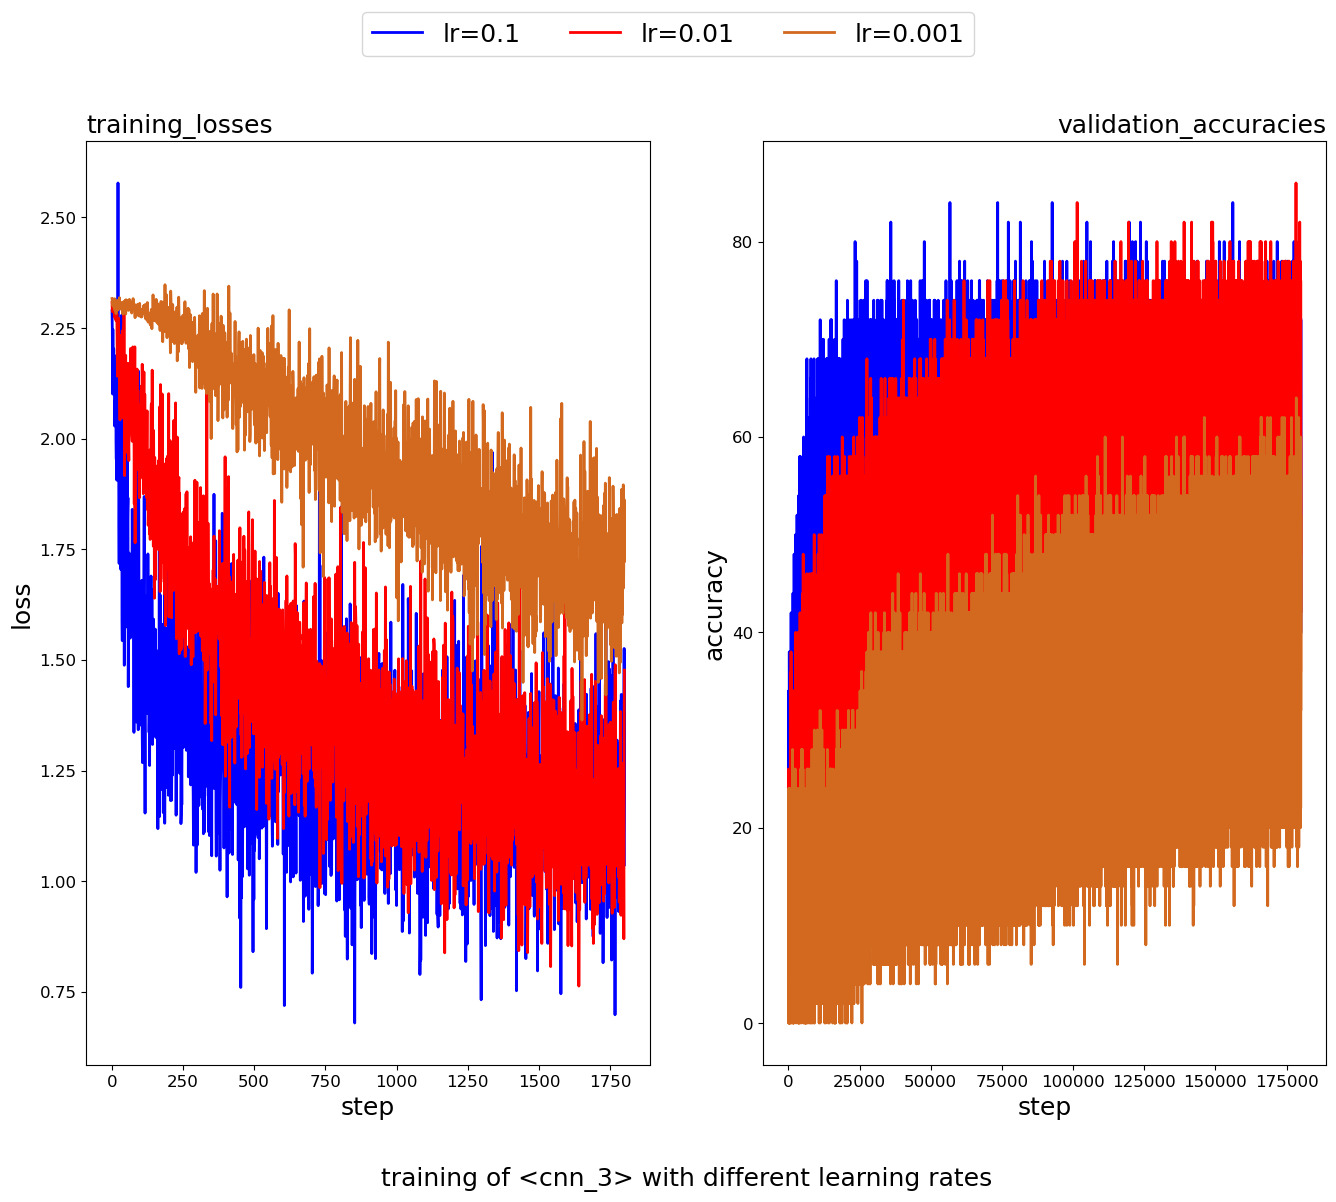

In [44]:
results = [train_result_dict]

part5Plots(results, save_dir=r'C:/Users/Yasin', filename='part5Plots')

In [83]:
# CNN3 Architecture Used For Scheduled Learning Rate
class cnn_3_scheduled_1(torch.nn.Module):
  def __init__(self):
    super(cnn_3_scheduled_1, self).__init__()
    self.conv1 = torch.nn.Conv2d(1, 16, kernel_size = (3,3), stride = 1, padding = 0)
    self.relu1 = torch.nn.ReLU()
    self.conv2 = torch.nn.Conv2d(16, 8, kernel_size = (5,5), stride = 1, padding = 0)
    self.relu2 = torch.nn.ReLU()
    self.maxpool1 = torch.nn.MaxPool2d(kernel_size = (2,2), stride = 2, padding = 0)
    self.conv3 = torch.nn.Conv2d(8, 16, kernel_size = (7,7), stride = 1, padding = 0)
    self.maxpool2 = torch.nn.MaxPool2d(kernel_size = (2,2), stride = 2, padding = 0)
    self.fc  = torch.nn.Linear(16*3*3, 10, bias = False)
    
  def forward(self, x):
    x = self.conv1(x)
    x = self.relu1(x)
    x = self.conv2(x)
    x = self.relu2(x)
    x = self.maxpool1(x)
    x = self.conv3(x)
    x = self.maxpool2(x)
    x = x.view(-1, 16*3*3)
    
    x = self.fc(x)
    return x

In [ ]:
model_sch_1 = cnn_3_scheduled_1()
model_sch_1.to(device)

In [87]:
# Create train loss and validation accuracy lists
train_loss_sch_1 = []
validation_accuracy_sch_1 = []

In [93]:
# Create the SGD optimizer
# Change the learning rate from 0.1 to 0.01 after 10 epochs and run the training code again 
optimizer = torch.optim.SGD(model_sch_1.parameters(), lr = 0.01, momentum = 0)

# After running 10 epoch, change the epoch to 20
epoch = 20

In [ ]:
# Traing the model
# Calculate the total number of batches from division of train set and batch size 
batch_number = int(len(train_generator.dataset)/batch_size)

# Train and evaluate the model
# Create loss: use cross entropy loss
loss_func = torch.nn.CrossEntropyLoss()
  
# For loop that iterates for each epoch
for cur_epoch in range(epoch):
  # Transfer the model to train mode
  model_sch_1.train()
  for batch_idx, (x_train, y_train) in enumerate(train_generator):
    # Transfer the input and the output to the used device (cpu or cuda)
    x_train, y_train = x_train.to(device), y_train.to(device)

    # At every iteration reset the gradient to zero so that start from scratch
    optimizer.zero_grad()

    # Make prediction by using the model
    y_prediction = model_sch_1(x_train)

    # Calculate the loss  
    loss = loss_func(y_prediction, y_train)

    # Backward pass and optimization step
    loss.backward()
    optimizer.step()
    
    if (batch_idx + 1) % 10 == 0:
      # Save training loss for every 10 steps
      train_loss_sch_1.append(loss.item())

      # Save validation accuracy for every 10 steps
      for x_validation, y_validation in validation_generator:
        x_validation = x_validation.to(device)
        y_validation = y_validation.to(device)

        # Transfer the model to eval mode         
        model_sch_1.eval()
        with torch.no_grad():

          # Calculate the validation accuracy
          # Initialize the correct and total predictions
          correct_validation = 0
          total_validation = 0

          output = model_sch_1(x_validation)
          y_prediction = output.argmax(dim=1)

          for i in range(y_prediction.shape[0]):
            if y_validation[i] == y_prediction[i]:
              correct_validation += 1
            total_validation += 1

          # Append the validation accuracy result to the list
          validation_acc_sch_1 = 100 * correct_validation / total_validation
          validation_accuracy_sch_1.append(validation_acc_sch_1)

      print('Epoch [{}/{}], Step [{}/{}], Training Loss: {:.2f}, Validation Acc: {:.2f}%'
                    .format(cur_epoch+1, epoch, batch_idx + 1, len(train_generator), loss.item(), validation_acc_sch_1))

In [95]:
train_result_dict_sch_1 = {
    'name': 'cnn_3_sch_1',
    'loss_curve_1': train_loss_sch_1,
    'val_acc_curve_1': validation_accuracy_sch_1,
}

# Save the dictionary object to a file
filename = 'part5_cnn_3_sch_1.pkl'
with open(filename, 'wb') as f:
    pickle.dump(train_result_dict, f)

KeyError: 'loss_curve_01'

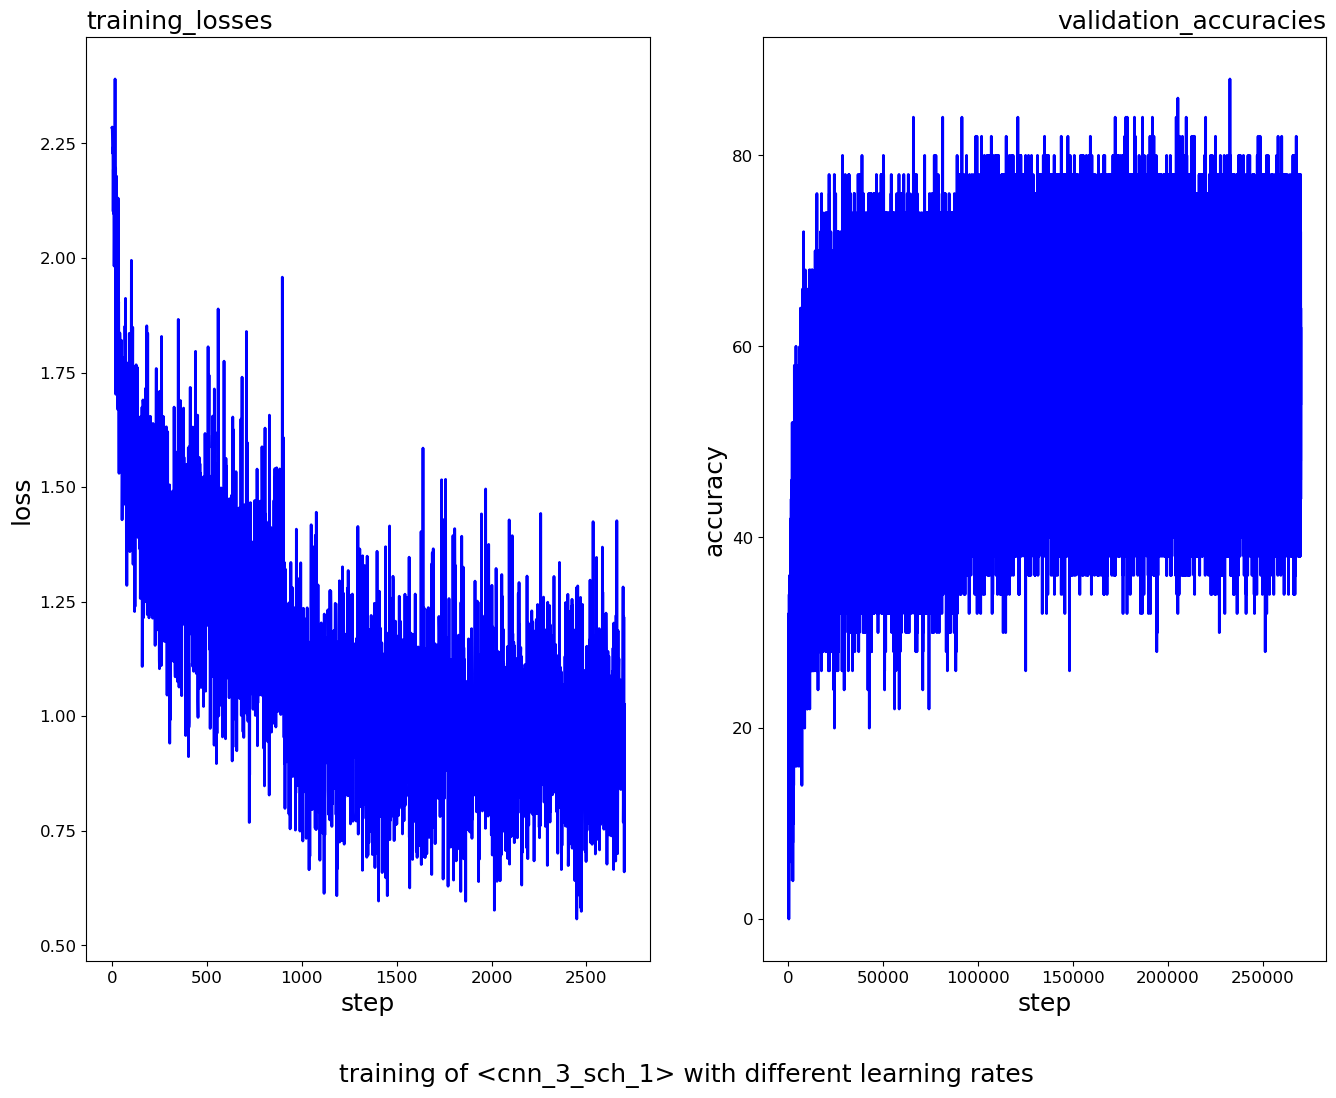

In [96]:
results_sch_1 = [train_result_dict_sch_1]

part5Plots(results_sch_1, save_dir=r'C:/Users/Yasin', filename='part5Plots_sch_1')

In [97]:
# CNN3 Architecture Used For Scheduled Learning Rate
class cnn_3_scheduled_01(torch.nn.Module):
  def __init__(self):
    super(cnn_3_scheduled_01, self).__init__()
    self.conv1 = torch.nn.Conv2d(1, 16, kernel_size = (3,3), stride = 1, padding = 0)
    self.relu1 = torch.nn.ReLU()
    self.conv2 = torch.nn.Conv2d(16, 8, kernel_size = (5,5), stride = 1, padding = 0)
    self.relu2 = torch.nn.ReLU()
    self.maxpool1 = torch.nn.MaxPool2d(kernel_size = (2,2), stride = 2, padding = 0)
    self.conv3 = torch.nn.Conv2d(8, 16, kernel_size = (7,7), stride = 1, padding = 0)
    self.maxpool2 = torch.nn.MaxPool2d(kernel_size = (2,2), stride = 2, padding = 0)
    self.fc  = torch.nn.Linear(16*3*3, 10, bias = False)
    
  def forward(self, x):
    x = self.conv1(x)
    x = self.relu1(x)
    x = self.conv2(x)
    x = self.relu2(x)
    x = self.maxpool1(x)
    x = self.conv3(x)
    x = self.maxpool2(x)
    x = x.view(-1, 16*3*3)
    
    x = self.fc(x)
    return x

In [ ]:
model_sch_01 = cnn_3_scheduled_01()
model_sch_01.to(device)

In [99]:
# Create train loss and validation accuracy lists
train_loss_sch_01 = []
validation_accuracy_sch_01 = []

In [102]:
# Create the SGD optimizer
# Change the learning rate from 0.01 to 0.001 after 10 epochs and run the training code again 
optimizer = torch.optim.SGD(model_sch_01.parameters(), lr = 0.001, momentum = 0)

# After running 15 epoch, remain the epoch number the same as
epoch = 15

In [ ]:
# Traing the model
# Calculate the total number of batches from division of train set and batch size 
batch_number = int(len(train_generator.dataset)/batch_size)

# Train and evaluate the model
# Create loss: use cross entropy loss
loss_func = torch.nn.CrossEntropyLoss()
  
# For loop that iterates for each epoch
for cur_epoch in range(epoch):
  # Transfer the model to train mode
  model_sch_01.train()
  for batch_idx, (x_train, y_train) in enumerate(train_generator):
    # Transfer the input and the output to the used device (cpu or cuda)
    x_train, y_train = x_train.to(device), y_train.to(device)

    # At every iteration reset the gradient to zero so that start from scratch
    optimizer.zero_grad()

    # Make prediction by using the model
    y_prediction = model_sch_01(x_train)

    # Calculate the loss  
    loss = loss_func(y_prediction, y_train)

    # Backward pass and optimization step
    loss.backward()
    optimizer.step()
    
    if (batch_idx + 1) % 10 == 0:
      # Save training loss for every 10 steps
      train_loss_sch_01.append(loss.item())

      # Save validation accuracy for every 10 steps
      for x_validation, y_validation in validation_generator:
        x_validation = x_validation.to(device)
        y_validation = y_validation.to(device)

        # Transfer the model to eval mode         
        model_sch_01.eval()
        with torch.no_grad():

          # Calculate the validation accuracy
          # Initialize the correct and total predictions
          correct_validation = 0
          total_validation = 0

          output = model_sch_01(x_validation)
          y_prediction = output.argmax(dim=1)

          for i in range(y_prediction.shape[0]):
            if y_validation[i] == y_prediction[i]:
              correct_validation += 1
            total_validation += 1

          # Append the validation accuracy result to the list
          validation_acc_sch_01 = 100 * correct_validation / total_validation
          validation_accuracy_sch_01.append(validation_acc_sch_01)

      print('Epoch [{}/{}], Step [{}/{}], Training Loss: {:.2f}, Validation Acc: {:.2f}%'
                    .format(cur_epoch+1, epoch, batch_idx + 1, len(train_generator), loss.item(), validation_acc_sch_01))

In [106]:
train_result_dict_sch_01 = {
    'name': 'cnn_3_sch_01',
    'loss_curve_1': train_loss_sch_01,
    'val_acc_curve_1': validation_accuracy_sch_01,
}

# Save the dictionary object to a file
filename = 'part5_cnn_3_sch_01.pkl'
with open(filename, 'wb') as f:
    pickle.dump(train_result_dict, f)

KeyError: 'loss_curve_01'

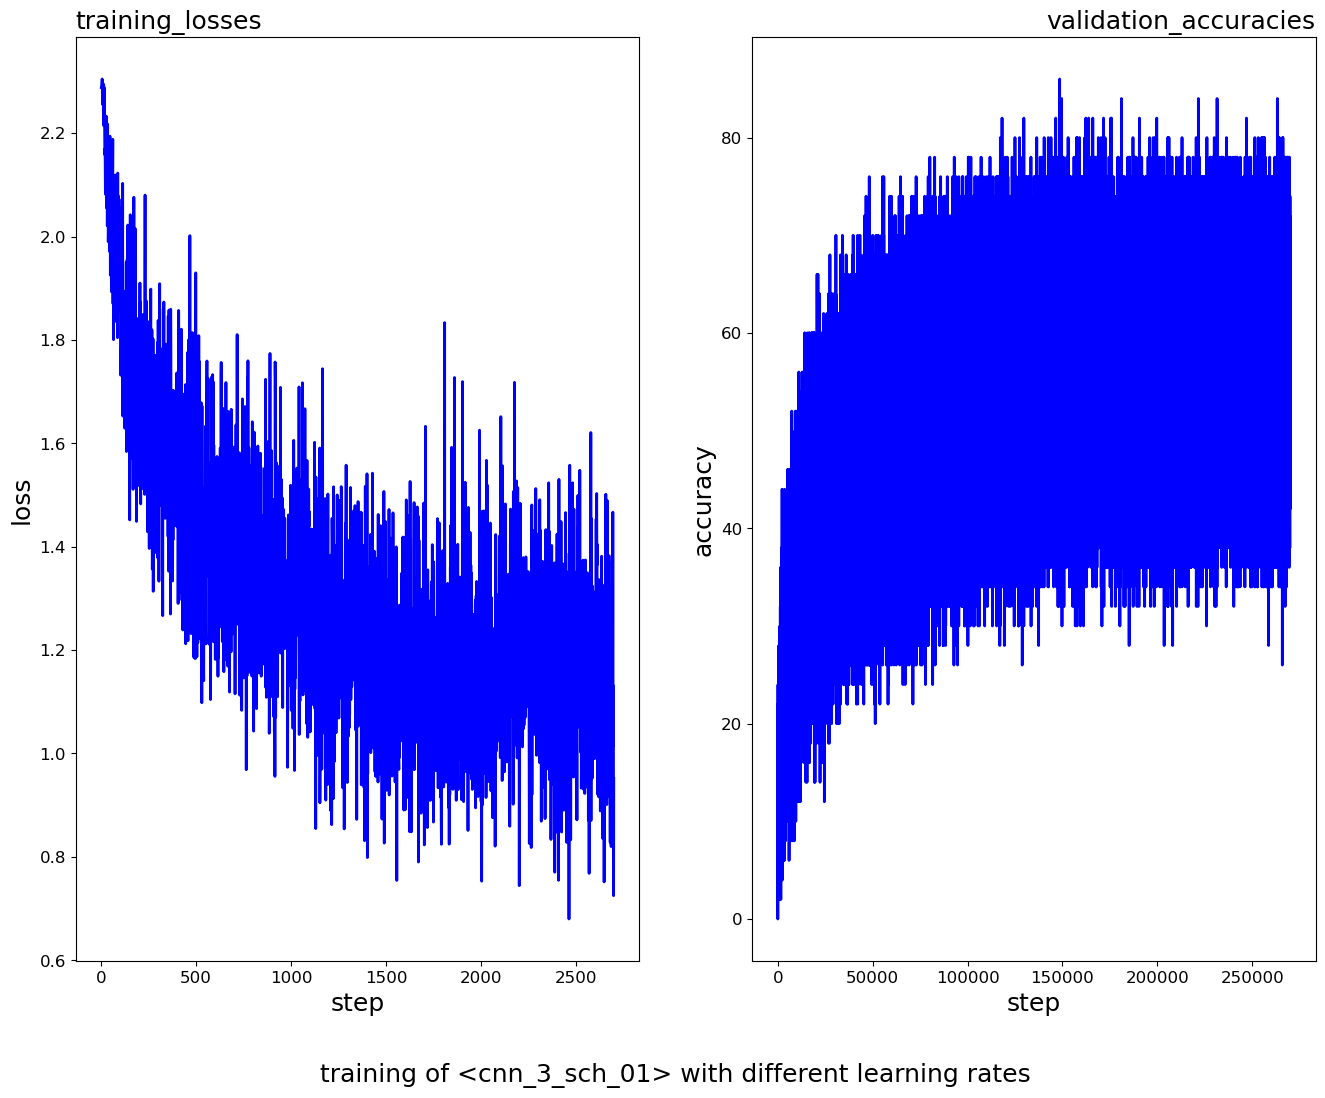

In [107]:
results_sch_01 = [train_result_dict_sch_01]

part5Plots(results_sch_01, save_dir=r'C:/Users/Yasin', filename='part5Plots_sch_01')

In [111]:
# Calculate the test accuracy
test_accuracy_01 = []
best_test_acc_01 = 0.0
model_sch_01.eval()
with torch.no_grad():
  correct_test = 0
  total_test = 0

  for x_test, y_test in test_generator:
    x_test = x_test.to(device)
    y_test = y_test.to(device)

    output = model_sch_01(x_test)
    y_prediction = output.argmax(dim=1)

    for i in range(y_prediction.shape[0]):
      if y_test[i] == y_prediction[i]:
        correct_test += 1
      total_test += 1

  # Append the result to the list
  test_accuracy_01.append(100 * correct_test / total_test)

  # Save the best test accuracy and best model weights
  for test_idx in range(len(test_accuracy_01)):
    if test_accuracy_01[test_idx] > best_test_acc_01:
      best_test_acc_01 = test_accuracy_01[test_idx]

In [112]:
# Open the pickle file of the cnn_3 model in part 3 
file = open('part3_cnn_3.pkl', 'rb')

# dump information to that file
data = pickle.load(file)

# close the file
file.close()

In [119]:
# Best test accuracy of the model trained in part3
data['test_acc']

58.92

In [120]:
# Best test accuracy of the model trained in the scheduled learning
best_test_acc_01

58.26

In [122]:
# Difference between two best test accuracies
best_test_acc_01 - data['test_acc']

-0.6600000000000037